In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

sys.path.append("../library")
import RecSys as rs
import specifyLibrary as sl
path = "../clean_data/"

In [2]:
chefmozGeo_r = pd.read_csv(path + "chefmozGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
chefmozProfile_r = pd.read_csv(path + "chefmozProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
rating_final_r = pd.read_csv(path + "rating_final_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userChefmozRelation_r = pd.read_csv(path + "userChefmozRelation_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userGeo_r = pd.read_csv(path + "userGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userProfile_r = pd.read_csv(path + "userProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)

In [3]:
userProfile_r.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,religion,activity,need_Parking,Rcuisine_Type,Upayment_accepts
0,1,yes,abstemious,informal,family,on foot,single,independent,none,student,no,North_American,no
1,2,yes,abstemious,informal,family,public,single,independent,Catholic,student,no,South_American,no
2,3,yes,social drinker,formal,family,public,single,independent,Catholic,student,no,South_American,no
3,4,yes,abstemious,informal,family,public,single,independent,none,professional,no,Breakfast;Asian;European;Bakery;South_American...,yes
4,5,yes,abstemious,other,family,public,single,independent,Catholic,student,no,North_American,no


In [4]:
rating_final_r.head()

,userID,placeID,rating,food_rating,service_rating
0,77,87,2,2,2
1,77,1,2,2,2
2,77,35,1,2,2
3,68,45,1,1,2
4,68,58,0,0,0


In [5]:
userChefmozRelation_r.head()

,userID,placeID,rating,food_rating,service_rating
0,77,87,1,1,1
1,77,1,1,1,1
2,77,35,0,1,1
3,68,45,0,0,1
4,68,58,-1,-1,-1


In [6]:
import random
random.seed(1234)
train, test = train_test_split(rating_final_r, test_size=0.2)
random.seed(1234)
train2, test2 = train_test_split(userChefmozRelation_r, test_size=0.2)

In [7]:
test.head()

,userID,placeID,rating,food_rating,service_rating
300,35,79,2,2,2
157,64,8,0,0,1
327,71,23,2,2,2
584,33,47,2,1,0
837,50,5,0,1,1


# Most Popular Restaurant

## Most visited Restaurant

In [8]:
train.shape

(698, 5)

In [9]:
train2.shape

(698, 5)

In [10]:
train[train['placeID']==87].shape

(27, 5)

In [11]:
train2[train2['placeID']==87].shape

(27, 5)

In [12]:
mostVisited = train.groupby('placeID')['userID'].count()
mostVisited2 = train2.groupby('placeID')['userID'].count()

In [13]:
train.head()

,userID,placeID,rating,food_rating,service_rating
226,76,67,0,1,1
811,136,92,1,1,1
605,3,65,2,2,2
756,97,32,2,2,1
393,9,82,1,1,2


In [14]:
mostVisited.sort_values(ascending=False).head(10)

placeID
1     28
87    27
85    23
41    20
52    20
35    19
18    17
15    15
82    14
22    13
Name: userID, dtype: int64

In [15]:
mostVisitedRestaurant = list(mostVisited.sort_values(ascending=False).index)
mostVisitedRestaurant2 = list(mostVisited2.sort_values(ascending=False).index)

In [16]:
mostVisitedRestaurant[:5]

[1, 87, 85, 41, 52]

In [17]:
mostVisitedRestaurant2[:5]

[87, 1, 41, 52, 85]

## Most Rated Restaurant

In [18]:
train.groupby('placeID')['rating'].count().head()

placeID
0     5
1    28
2     8
3     4
4     4
Name: rating, dtype: int64

In [19]:
train2.groupby('placeID')['rating'].count().head()

placeID
0     4
1    23
2     8
3     4
4     5
Name: rating, dtype: int64

In [20]:
mostRated = train.groupby('placeID')['rating'].sum()
mostRated2 = train2.groupby('placeID')['rating'].sum()

In [21]:
mostRated.sort_values(ascending=False).head(10)

placeID
1     39
87    36
85    27
41    24
35    23
22    21
15    20
18    20
76    18
86    17
Name: rating, dtype: int64

In [22]:
mostRated2.sort_values(ascending=False).head(10)

placeID
22    9
1     8
87    8
41    7
15    7
86    6
76    6
79    6
23    5
44    5
Name: rating, dtype: int64

In [23]:
mostRatedRestaurant = list(mostRated.sort_values(ascending=False).index)
mostRatedRestaurant2 = list(mostRated2.sort_values(ascending=False).index)

## Highest mean rating Restaurant

In [24]:
train.groupby('placeID')['rating'].count().sort_values(ascending=False).head(10)

placeID
1     28
87    27
85    23
41    20
52    20
35    19
18    17
15    15
82    14
22    13
Name: rating, dtype: int64

In [25]:
train.groupby('placeID')['rating'].count().sort_values(ascending=True).head(10)

placeID
14    1
37    2
73    2
55    2
89    2
12    2
38    3
50    3
66    3
49    3
Name: rating, dtype: int64

In [26]:
def filteredListRatedRestaurant(train, min_ratings=0):
    listRatedRestaurant = train.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [127]:
filteredListRatedRestaurant(train).head(10)

,placeID,rating,mean
34,34,"[2, 2, 2]",2.000000
32,32,"[2, 2, 2, 2]",2.000000
79,79,"[2, 2, 2, 2, 2]",2.000000
65,65,"[2, 2, 2, 2, 1]",1.800000
70,70,"[2, 2, 1, 2, 2]",1.800000
75,75,"[2, 2, 2, 1]",1.750000
60,60,"[1, 1, 2, 2, 2, 2]",1.666667
38,38,"[2, 2, 1]",1.666667
19,19,"[0, 2, 2, 1, 2, 2, 2, 2, 2]",1.666667
63,63,"[2, 2, 2, 1, 2, 1]",1.666667


In [28]:
filteredListRatedRestaurant(train,5).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
79,79,"[2, 2, 2, 2, 2]",2.000000
65,65,"[2, 2, 2, 2, 1]",1.800000
70,70,"[2, 2, 1, 2, 2]",1.800000
36,36,"[0, 2, 2, 2, 2, 2]",1.666667
60,60,"[1, 1, 2, 2, 2, 2]",1.666667
63,63,"[2, 2, 2, 1, 2, 1]",1.666667
19,19,"[0, 2, 2, 1, 2, 2, 2, 2, 2]",1.666667
76,76,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2]",1.636364
33,33,"[2, 2, 2, 0, 2, 1, 2, 2]",1.625000
22,22,"[1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]",1.615385


In [29]:
filteredListRatedRestaurant(train,10).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
76,76,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2]",1.636364
22,22,"[1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]",1.615385
85,86,"[2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2]",1.416667
44,44,"[1, 0, 2, 2, 1, 2, 2, 1, 1, 2]",1.400000
39,39,"[2, 2, 2, 1, 2, 1, 1, 2, 1, 0]",1.400000
1,1,"[2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, ...",1.392857
77,77,"[1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1]",1.363636
15,15,"[2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1]",1.333333
86,87,"[0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, ...",1.333333
27,27,"[1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2]",1.230769


In [30]:
rating_final_r['rating'].max()

2

## Excluding bad Rate

In [31]:
def filteredListRatedRestaurantExcluding(train, excludingRate=0, min_ratings=0):
    trainExcluding = train[train['rating']>=excludingRate]
    listRatedRestaurant = trainExcluding.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [32]:
filteredListRatedRestaurantExcluding(train).head()

,placeID,rating,mean
34,34,"[2, 2, 2]",2.0
32,32,"[2, 2, 2, 2]",2.0
79,79,"[2, 2, 2, 2, 2]",2.0
65,65,"[2, 2, 2, 2, 1]",1.8
70,70,"[2, 2, 1, 2, 2]",1.8


In [33]:
filteredListRatedRestaurantExcluding(train2,-1).head()

,placeID,rating,mean
70,70,"[1, 1, 1]",1.0
92,93,[1],1.0
34,34,"[1, 1, 1, 1]",1.0
32,32,"[1, 1, 1]",1.0
37,37,"[1, 1]",1.0


In [34]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
36,36,"[2, 2, 2, 2, 2]",2.000000
79,79,"[2, 2, 2, 2, 2]",2.000000
19,19,"[2, 2, 1, 2, 2, 2, 2, 2]",1.875000
33,33,"[2, 2, 2, 2, 1, 2, 2]",1.857143
70,70,"[2, 2, 1, 2, 2]",1.800000
21,21,"[2, 2, 2, 2, 1]",1.800000
65,65,"[2, 2, 2, 2, 1]",1.800000
76,76,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 2]",1.800000
22,22,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]",1.750000
83,83,"[2, 1, 1, 2, 2, 2, 2]",1.714286


In [35]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
76,76,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 2]",1.800000
22,22,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]",1.750000
41,41,"[2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2]",1.714286
15,15,"[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1]",1.666667
86,87,"[1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, ...",1.636364
27,27,"[1, 1, 2, 2, 2, 2, 1, 1, 2, 2]",1.600000
84,85,"[1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, ...",1.588235
1,1,"[2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, ...",1.560000
85,86,"[2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2]",1.545455
18,18,"[2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1]",1.538462


## Metrics for recommender systems

In [36]:
def recall_at_n(N, test, recommended, train=None):
    """
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return the recall
    """
    if train is not None: # Remove items in train
        # Esta línea de abajo estaría mal!!! por qué? Respuesta: al usar "set", perdemos el orden en la recomendación
        # rec_true =  set(recommended)- set(train)
        
        # Correct implementation
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
        # Equivalent 1-line of code:
        # rec_true = [r for r in recommended if r not in train]
    else:
        rec_true = recommended    
    intersection = len(set(test) & set(rec_true[:N]))
    return intersection / float(np.minimum(N, len(test)))

In [37]:
seen = [135025,135028,135023,135021,135026]
recommended = [135021,135024]
print(recall_at_n(1, seen, recommended))
print(recall_at_n(2, seen, recommended))
print(recall_at_n(3, seen, recommended))
print(recall_at_n(5, seen, recommended))
print(recall_at_n(10, seen, recommended))

1.0
0.5
0.3333333333333333
0.2
0.2


# Now Merge Test and Train

In [38]:
trainPlaceList = train.groupby('userID')['placeID'].apply(list).reset_index()
trainPlaceList2 = train2.groupby('userID')['placeID'].apply(list).reset_index()

In [39]:
testPlaceList = test.groupby('userID')['placeID'].apply(list).reset_index()
testPlaceList2 = test2.groupby('userID')['placeID'].apply(list).reset_index()

In [40]:
joined = pd.merge(trainPlaceList, testPlaceList, how='inner', on='userID', suffixes=('_train', '_test')).set_index('userID')
joined2 = pd.merge(trainPlaceList2, testPlaceList2, how='inner', on='userID', suffixes=('_train', '_test')).set_index('userID')

In [41]:
joined.head()

,placeID_train,placeID_test
userID,,
2,"[87, 27, 2, 1, 15, 33, 41, 31]",[77]
3,"[65, 39, 70, 33, 27, 15, 1, 83]","[76, 12, 25]"
4,"[86, 63, 85]","[32, 2, 26, 35]"
5,"[24, 18]","[27, 85, 71]"
6,"[25, 54, 1, 76, 44, 62]","[65, 6, 26, 23]"


In [42]:
joined2.head()

,placeID_train,placeID_test
userID,,
1,"[1, 69, 22]",[87]
2,"[77, 31, 2, 41, 33, 15, 1]","[27, 87]"
3,"[15, 27, 76, 33, 12, 25, 1, 83, 70, 65]",[39]
4,"[35, 63, 26, 86]","[32, 2, 85]"
5,"[71, 24, 27, 18]",[85]


In [43]:
# calculate the recall of the mostRatedMovies recommendation, for each user:
joined.apply(lambda l: recall_at_n(N=15, test=l[1], recommended=mostRatedRestaurant, train=l[0]), axis=1).head()

userID
2    1.000000
3    0.666667
4    0.250000
5    0.666667
6    0.000000
dtype: float64

In [44]:
# calculate the recall of the mostRatedMovies recommendation, for each user:
joined2.apply(lambda l: recall_at_n(N=15, test=l[1], recommended=mostRatedRestaurant2, train=l[0]), axis=1).head()

userID
1    1.0
2    0.5
3    1.0
4    0.0
5    0.0
dtype: float64

In [45]:
def apk(N, test, recommended, train=None):
    """
    Computes the average precision at N given recommendations.
    
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return The average precision at N over the test set
    """
    if train is not None: 
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
    else:
        rec_true = recommended    
    predicted = rec_true[:N] # top-k predictions
    
    score = 0.0 # This will store the numerator
    num_hits = 0.0 # This will store the sum of rel(i)

    for i,p in enumerate(predicted):
        if p in test and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits/(i+1.0)
    return score / min(len(test), N)

In [46]:
topN = 1
predictions = mostVisitedRestaurant[:]
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.12
map@10=0.16


In [47]:
topN = 1
predictions = mostVisitedRestaurant2[:]
m1 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.15
map@10=0.15


In [48]:
topN = 1
predictions = mostRatedRestaurant
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.11
map@10=0.14


In [49]:
topN = 1
predictions = mostRatedRestaurant2
m1 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.03
map@10=0.08


In [50]:
topN = 1
predictions = list(filteredListRatedRestaurant(train)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.02
map@10=0.03


In [51]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.03
map@10=0.04


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,10)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.03
map@10=0.06


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [53]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.03


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.03


In [55]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=2,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.04
map@10=0.08


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Co-occurrence Matrix¶

In [56]:
# create a dictionary of restaurant per user
restaurantPerUser = (train[train['rating']>=1]
                 .groupby('userID')['placeID']
                 .apply(np.array)
                 .to_dict()
                 )

In [57]:
# create a dictionary of restaurant per user
restaurantPerUser2 = (train2[train2['rating']>=0]
                 .groupby('userID')['placeID']
                 .apply(np.array)
                 .to_dict()
                 )

In [58]:
# calculate the number of items in train
n_items = len(chefmozGeo_r['placeID'].unique())
n_items

95

In [59]:
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,restaurant in restaurantPerUser.items():
    for r in restaurant:
        coMatrix[r, restaurant] += 1

In [60]:
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix2 = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,restaurant in restaurantPerUser2.items():
    for r in restaurant:
        coMatrix2[r, restaurant] += 1

In [61]:
userProfile_r[userProfile_r['userID']==1][['Rcuisine_Type','dress_preference','need_Parking','Upayment_accepts']].values[0]

array(['North_American', 'informal', 'no', 'no'], dtype=object)

In [62]:
userProfile_r.loc(0)[2]

userID                           3
smoker                         yes
drink_level         social drinker
dress_preference            formal
ambience                    family
transport                   public
marital_status              single
hijos                  independent
religion                  Catholic
activity                   student
need_Parking                    no
Rcuisine_Type       South_American
Upayment_accepts                no
Name: 2, dtype: object

In [63]:
userCoMatrix = sl.userCoMatrix(1,userProfile_r,n_items,coMatrix)

../library/specifyLibrary.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if coMatix=='noMatrix':
../library/specifyLibrary.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  userInfo['Rcuisine_Type'] = userInfo['Rcuisine_Type'].map(lambda x: x.split(';'))


In [64]:
userCoMatrix

array([[ 7.,  2.,  2., ...,  2.,  2.,  4.],
       [ 2., 27.,  4., ...,  2.,  2.,  2.],
       [ 2.,  4.,  7., ...,  2.,  2.,  2.],
       ...,
       [ 2.,  2.,  2., ...,  7.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  4.,  2.],
       [ 4.,  2.,  2., ...,  2.,  2.,  5.]])

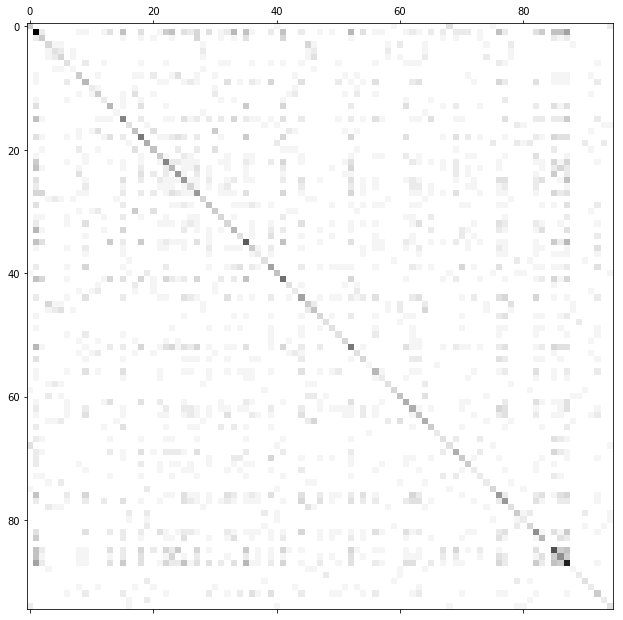

In [65]:
# visualize the matrix
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

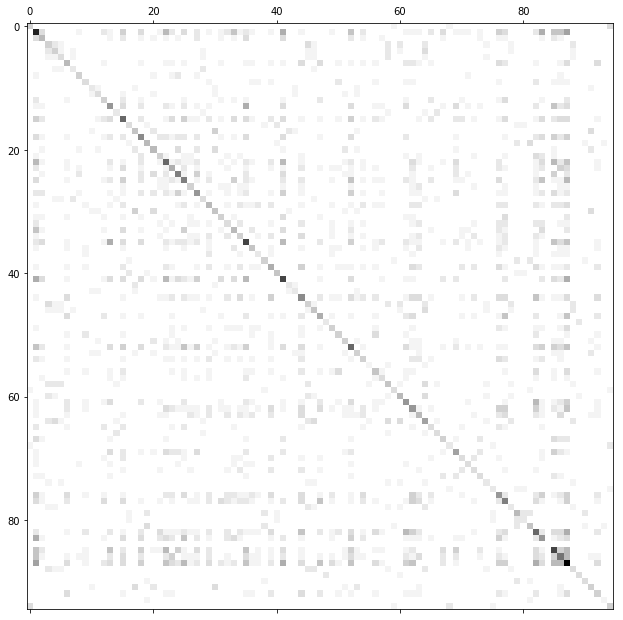

In [66]:
# visualize the matrix
plt.matshow(coMatrix2, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

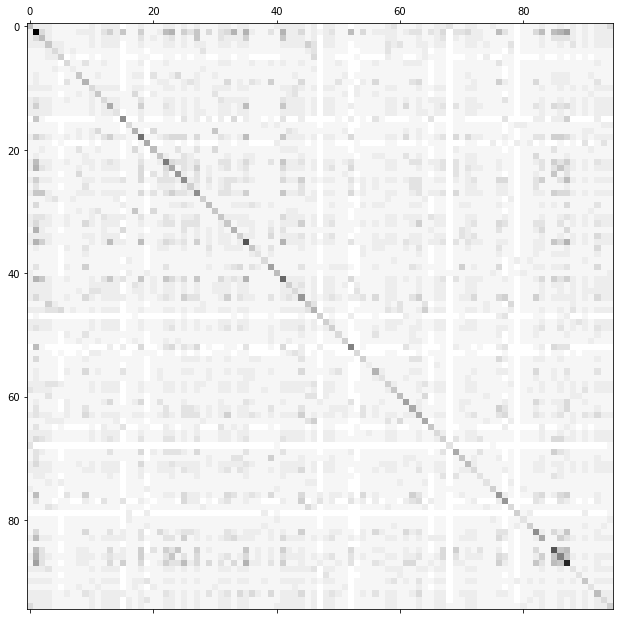

In [67]:
# visualize the matrix
plt.matshow(userCoMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

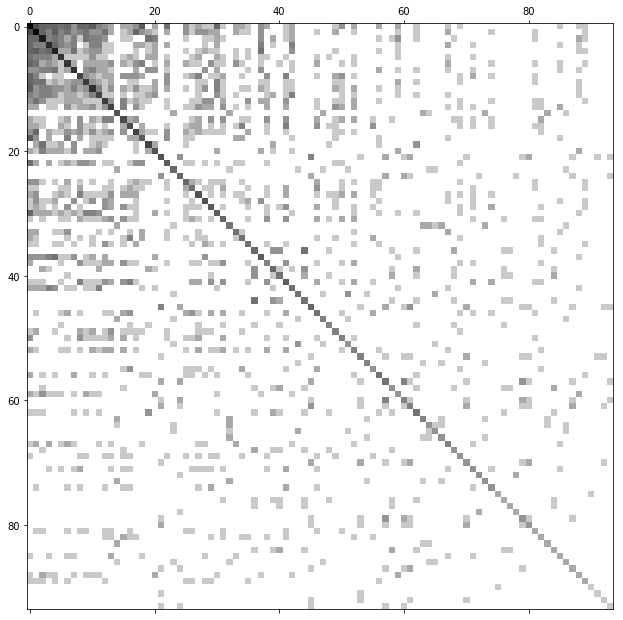

In [68]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = coMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

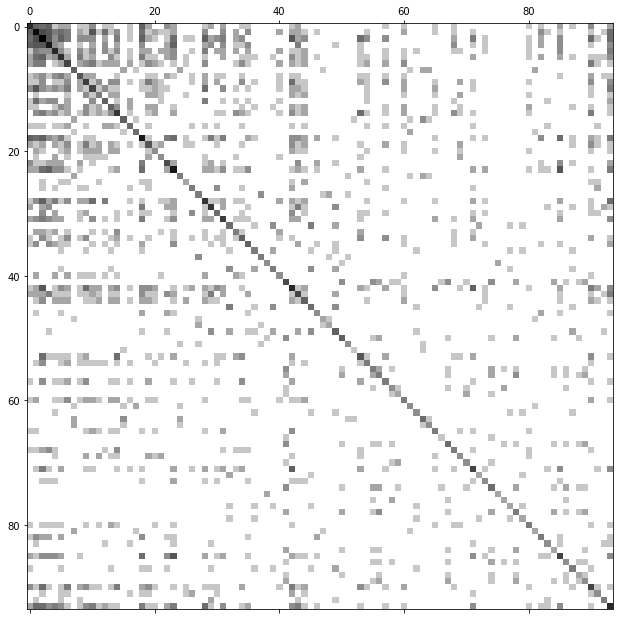

In [69]:
popular_indexing = mostRatedRestaurant2
coMatrix_sorted = coMatrix2[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

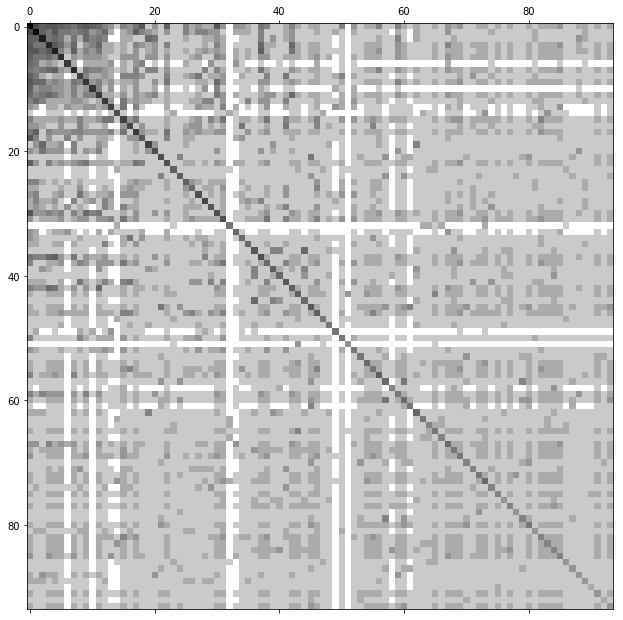

In [70]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = userCoMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [71]:
def co_occurrance_similarity(item_id, coocurrance, ntop=5):
    """
    Returns the top-N most similar items to a given one, based on the coocurrance matrix
    
    :param item_id: id of input item
    :param cooccurrance: 2-dim numpy array with the co-occurance matrix
    :param ntop: number of items to be retrieved
    
    :return top-N most similar items to the given item_id
    """
    similarItems = coocurrance[item_id, :]
    # return indeces of most similar items in descendign order
    mostSimilar = np.argsort(similarItems)[::-1]
    # remove the item itslef, maybe it's not the first element
    ##### mostSimilar = mostSimilar[1:ntop+1]
    mostSimilar = list(mostSimilar)
    mostSimilar.remove(item_id)
    mostSimilar = np.array(mostSimilar)[:ntop]
    
    # return a numpy array with the index (first column) and the value (second column) of the most similar items
    return np.stack((mostSimilar, similarItems[mostSimilar])).T

In [72]:
# First column are indices, while second one is the frequency of co-ocurrance
co_occurrance_similarity(1, userCoMatrix, 5)

array([[87., 10.],
       [35.,  8.],
       [33.,  8.],
       [41.,  8.],
       [86.,  8.]])

In [73]:
co_occurrance_similarity(1, coMatrix, 5)

array([[87.,  9.],
       [52.,  7.],
       [33.,  7.],
       [35.,  6.],
       [85.,  6.]])

In [74]:
co_occurrance_similarity(1, coMatrix, 10)

array([[87.,  9.],
       [52.,  7.],
       [33.,  7.],
       [35.,  6.],
       [85.,  6.],
       [15.,  6.],
       [23.,  6.],
       [41.,  6.],
       [76.,  6.],
       [86.,  6.]])

In [75]:
co_occurrance_similarity(49, coMatrix, 5)

array([[47.,  1.],
       [82.,  1.],
       [70.,  1.],
       [56.,  1.],
       [29.,  1.]])

In [76]:
def co_occurrance_recommendation(items_id, cooccurrance, ntop=10):
    """
    Obtain the list of ntop recommendations based on a list of items (user history of views)
    
    :param items_id: list of items ids
    :param coocurrence: co-ocurrence matrix (numpy 2-dim array)
    :param ntop: top-K items to be retrieved
    
    :return list of ntop items recommended
    """
    # put together all the similar items and its value. For this, use np.vstack, wich stacks one array after 
    # another (row wise)
    list_sim_items = np.vstack([co_occurrance_similarity(id_, cooccurrance, ntop) for id_ in items_id])
    # Group by id and take the maximum frquency to remove duplicates
    largest_freq = pd.DataFrame(list_sim_items, columns=['id', 'freq']).groupby('id').agg(max).reset_index()
    
    # sort by value in descending order
    sorted_list = largest_freq.sort_values(by='freq', ascending=False)
    
    # get the top N
    out = sorted_list.values[:ntop, 0]
    return out

In [77]:
# get users in train with their movies
trainUsersGrouped = train[train['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
testUsersGrouped = test[test['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
trainUsersGrouped.head()

,userID,placeID
0,1,"[22, 69, 1]"
1,2,"[87, 27, 2, 1, 15, 33, 41, 31]"
2,3,"[65, 39, 70, 33, 15, 1, 83]"
3,4,"[86, 63, 85]"
4,5,"[24, 18]"


In [78]:
co_occurrance_recommendation([69, 22, 1],coMatrix,5)

array([87., 33., 52., 35., 85.])

In [79]:
co_occurrance_recommendation([69, 22, 1],userCoMatrix,5)

array([87., 33., 35., 41., 86.])

In [80]:
Ntop = 5
# Get the recommendations for all users using the apply method
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, coMatrix, Ntop))
predictions.head()

0    [87.0, 33.0, 52.0, 35.0, 85.0]
1     [1.0, 87.0, 33.0, 52.0, 35.0]
2     [87.0, 1.0, 33.0, 52.0, 35.0]
3     [1.0, 87.0, 24.0, 35.0, 85.0]
4     [35.0, 85.0, 41.0, 52.0, 8.0]
Name: placeID, dtype: object

In [81]:
usersIDs = trainUsersGrouped['userID'].values
placeIDs = trainUsersGrouped['placeID'].values

In [82]:
Ntop = 5
predictions = sl.co_occurrance_recommendation_for_list_users(usersIDs,placeIDs,coMatrix,userProfile_r,n_items,Ntop)
predictions = pd.DataFrame({'predictions_userCoMatrix':predictions})
predictions.head()

../library/specifyLibrary.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if coMatix=='noMatrix':
../library/specifyLibrary.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  userInfo['Rcuisine_Type'] = userInfo['Rcuisine_Type'].map(lambda x: x.split(';'))


,predictions_userCoMatrix
0,"[87.0, 33.0, 35.0, 41.0, 86.0]"
1,"[1.0, 87.0, 86.0, 23.0, 35.0]"
2,"[87.0, 86.0, 52.0, 1.0, 23.0]"
3,"[1.0, 24.0, 85.0, 86.0, 87.0]"
4,"[35.0, 41.0, 85.0, 1.0, 13.0]"


In [83]:
topN = 5
# add a prediction column to train
trainUsersGrouped['prediction_coMatrix'] = trainUsersGrouped['placeID'].apply(
    lambda x: co_occurrance_recommendation(x, coMatrix, topN)
)
trainUsersGrouped['predictions_userCoMatrix'] = predictions['predictions_userCoMatrix']

In [84]:
trainUsersGrouped.head()

,userID,placeID,prediction_coMatrix,predictions_userCoMatrix
0,1,"[22, 69, 1]","[87.0, 33.0, 52.0, 35.0, 85.0]","[87.0, 33.0, 35.0, 41.0, 86.0]"
1,2,"[87, 27, 2, 1, 15, 33, 41, 31]","[1.0, 87.0, 33.0, 52.0, 35.0]","[1.0, 87.0, 86.0, 23.0, 35.0]"
2,3,"[65, 39, 70, 33, 15, 1, 83]","[87.0, 1.0, 33.0, 52.0, 35.0]","[87.0, 86.0, 52.0, 1.0, 23.0]"
3,4,"[86, 63, 85]","[1.0, 87.0, 24.0, 35.0, 85.0]","[1.0, 24.0, 85.0, 86.0, 87.0]"
4,5,"[24, 18]","[35.0, 85.0, 41.0, 52.0, 8.0]","[35.0, 41.0, 85.0, 1.0, 13.0]"


In [85]:
joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))

In [86]:
joined.head()

,userID,placeID_train,prediction_coMatrix,predictions_userCoMatrix,placeID_test
0,2,"[87, 27, 2, 1, 15, 33, 41, 31]","[1.0, 87.0, 33.0, 52.0, 35.0]","[1.0, 87.0, 86.0, 23.0, 35.0]",[77]
1,3,"[65, 39, 70, 33, 15, 1, 83]","[87.0, 1.0, 33.0, 52.0, 35.0]","[87.0, 86.0, 52.0, 1.0, 23.0]","[76, 12, 25]"
2,4,"[86, 63, 85]","[1.0, 87.0, 24.0, 35.0, 85.0]","[1.0, 24.0, 85.0, 86.0, 87.0]","[32, 2, 26, 35]"
3,5,"[24, 18]","[35.0, 85.0, 41.0, 52.0, 8.0]","[35.0, 41.0, 85.0, 1.0, 13.0]","[27, 85]"
4,6,"[25, 54, 1, 76, 44, 62]","[87.0, 33.0, 52.0, 35.0, 85.0]","[87.0, 52.0, 33.0, 86.0, 1.0]","[65, 6, 26, 23]"


In [87]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.250


In [88]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.242


In [89]:
# do the same for different top k values. It might be convenient to define a function!
def evaluate_recall(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall_coMatrix
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall_userCoMatrix
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
    print("Co-occurance User model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall for the baseline
    recall_baseline = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: recall@%s=%.3f"%(topN, recall_baseline))    
    return recall, recall_baseline

In [90]:
for k in [3,5,10,30,50,100]:
    print('-----------')
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

-----------
Co-occurance model: recall@3=0.591
Co-occurance User model: recall@3=0.502
Popularity model: recall@3=0.244
-----------
Co-occurance model: recall@5=0.667
Co-occurance User model: recall@5=0.467
Popularity model: recall@5=0.280
-----------
Co-occurance model: recall@10=0.329
Co-occurance User model: recall@10=0.300
Popularity model: recall@10=0.364
-----------
Co-occurance model: recall@30=0.111
Co-occurance User model: recall@30=0.108
Popularity model: recall@30=0.539
-----------
Co-occurance model: recall@50=0.067
Co-occurance User model: recall@50=0.065
Popularity model: recall@50=0.624
-----------
Co-occurance model: recall@100=0.035
Co-occurance User model: recall@100=0.035
Popularity model: recall@100=0.939


In [91]:
def evaluate_map(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: map@%s=%.3f"%(topN, map_))
    # calculate average recall UserCoMatrix
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
    print("Co-occurance UserCoMatrix model: map@%s=%.3f"%(topN, map_))
    
    map_baseline = joined.apply(lambda l: 
                 apk(N=topN, test=l[4], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: map@%s=%.3f"%(topN, map_baseline))
    return map_, map_baseline

In [92]:
for k in [3,5,10,30,50,100]:
    print('-------')
    evaluate_map(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

-------
Co-occurance model: map@3=0.568
Co-occurance UserCoMatrix model: map@3=0.480
Popularity model: map@3=0.230
-------
Co-occurance model: map@5=0.667
Co-occurance UserCoMatrix model: map@5=0.444
Popularity model: map@5=0.237
-------
Co-occurance model: map@10=0.329
Co-occurance UserCoMatrix model: map@10=0.296
Popularity model: map@10=0.302
-------
Co-occurance model: map@30=0.111
Co-occurance UserCoMatrix model: map@30=0.108
Popularity model: map@30=0.422
-------
Co-occurance model: map@50=0.067
Co-occurance UserCoMatrix model: map@50=0.065
Popularity model: map@50=0.491
-------
Co-occurance model: map@100=0.035
Co-occurance UserCoMatrix model: map@100=0.035
Popularity model: map@100=0.939


# Oher distances

In [93]:
# note that the diagonal of CoMatrix provides the number of visualizations of each movie
np.diag(coMatrix)

array([ 5., 25.,  5.,  4.,  3.,  4.,  3.,  1.,  5.,  7.,  2.,  5.,  2.,
        7.,  1., 12.,  3.,  6., 13.,  8.,  6.,  5., 12.,  7., 10., 10.,
        4., 10.,  4.,  6.,  5.,  4.,  4.,  7.,  3., 16.,  5.,  2.,  3.,
        9.,  6., 14.,  3.,  2.,  9.,  5.,  6.,  4.,  3.,  3.,  3.,  4.,
       13.,  3.,  4.,  1.,  7.,  2.,  3.,  4.,  6.,  8.,  8.,  6.,  8.,
        5.,  2.,  3.,  3.,  8.,  5.,  5.,  2.,  2.,  2.,  4., 10., 10.,
        3.,  5.,  2.,  4., 11.,  7.,  0., 17., 11., 22.,  1.,  2.,  3.,
        2.,  5.,  2.,  3.])

In [94]:
jaccard = np.zeros((n_items, n_items)) # Jaccard similarity matrix
for i, row in enumerate(coMatrix):
    if row[i]!=0: # Case where the diagonal is not empty, i.e. coM(i,i)!=0
        jaccard[i,:] = row/(row[i]+np.diag(coMatrix)-row)
    else: # case where the diagonal is empty. We have to aasign a similarity of 1 to item pairs without ratings
        for j in np.arange(n_items):
            if coMatrix[j,j]==0:
                jaccard[i,j] = 1.0
            else: 
                jaccard[i,j] = 0.0

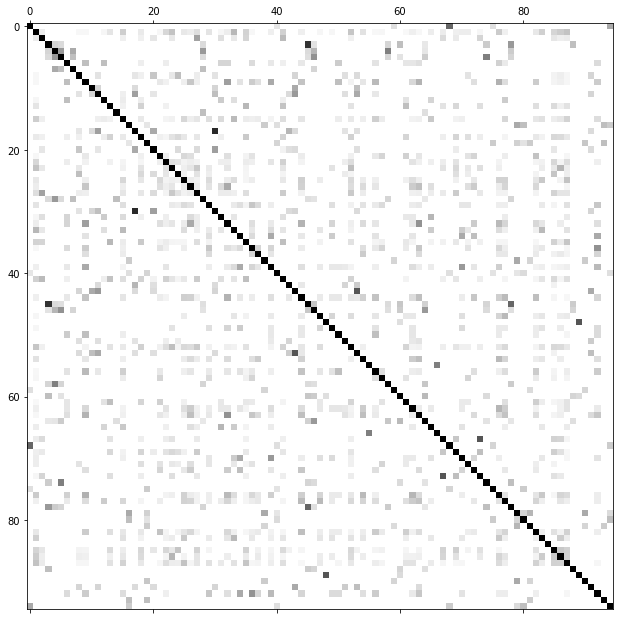

In [95]:
# visualize the matrix
plt.matshow(jaccard, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

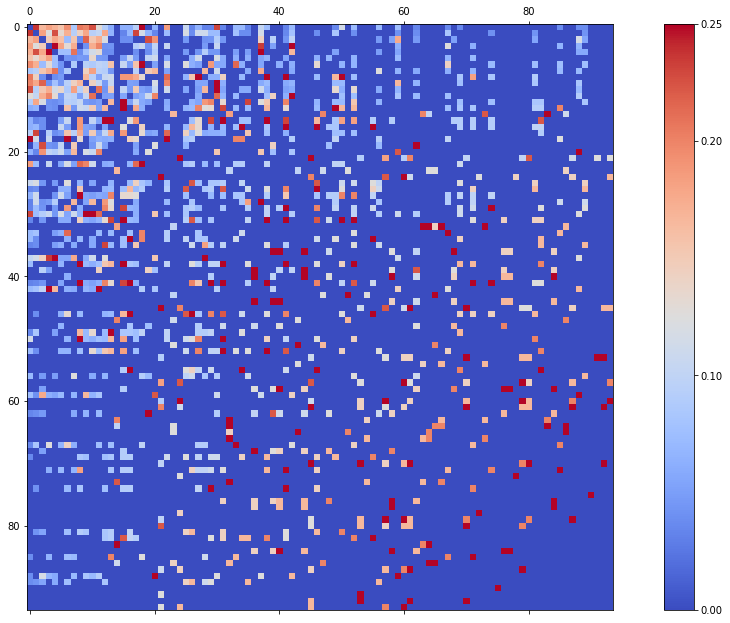

In [96]:
popular_indexing = mostRatedRestaurant[:]
jaccard_sorted = jaccard[:,popular_indexing]
jaccard_sorted_total = jaccard_sorted[popular_indexing, :]

# Remove ones:
jaccard_sorted_total[jaccard_sorted_total == 1.0] = 0.0
cax = plt.matshow(jaccard_sorted_total, fignum=1000, cmap=plt.cm.coolwarm)
plt.gcf().colorbar(cax, ticks=[0, 0.1, 0.2, 0.25])
plt.clim(0, 0.25)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [97]:
Ntop = 5
# Calculate the predictoins with Jaccard
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, jaccard, Ntop))
predictions.head()

0    [33.0, 73.0, 87.0, 23.0, 52.0]
1      [27.0, 2.0, 65.0, 1.0, 33.0]
2     [70.0, 39.0, 9.0, 34.0, 31.0]
3     [32.0, 9.0, 23.0, 26.0, 44.0]
4     [8.0, 85.0, 35.0, 52.0, 13.0]
Name: placeID, dtype: object

In [98]:
testUsersGrouped.values[:3, 1]

array([list([77]), list([76, 12, 25]), list([32, 2, 26, 35])],
      dtype=object)

In [99]:
predictions[:3]

0    [33.0, 73.0, 87.0, 23.0, 52.0]
1      [27.0, 2.0, 65.0, 1.0, 33.0]
2     [70.0, 39.0, 9.0, 34.0, 31.0]
Name: placeID, dtype: object

In [100]:
for (seen, recom) in zip(testUsersGrouped.values[:3, 1], predictions[:3]):
    print("*"*6)
    print("Seen items: ")
    print([i for i in seen])
    print("Recommended items: ")
    print([i for i in recom])

******
Seen items: 
[77]
Recommended items: 
[33.0, 73.0, 87.0, 23.0, 52.0]
******
Seen items: 
[76, 12, 25]
Recommended items: 
[27.0, 2.0, 65.0, 1.0, 33.0]
******
Seen items: 
[32, 2, 26, 35]
Recommended items: 
[70.0, 39.0, 9.0, 34.0, 31.0]


In [101]:
for k in [3,5,10,30,50,100]:
    print('----------')
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, jaccard, mostRatedRestaurant[:]);

----------
Co-occurance model: recall@3=0.236
Co-occurance User model: recall@3=0.213
Popularity model: recall@3=0.036
----------
Co-occurance model: recall@5=0.272
Co-occurance User model: recall@5=0.229
Popularity model: recall@5=0.064
----------
Co-occurance model: recall@10=0.243
Co-occurance User model: recall@10=0.211
Popularity model: recall@10=0.147
----------
Co-occurance model: recall@30=0.110
Co-occurance User model: recall@30=0.107
Popularity model: recall@30=0.478
----------
Co-occurance model: recall@50=0.067
Co-occurance User model: recall@50=0.065
Popularity model: recall@50=0.624
----------
Co-occurance model: recall@100=0.035
Co-occurance User model: recall@100=0.035
Popularity model: recall@100=0.939


# Memory-Based Collaborative Filtering (CF)

In [102]:
train.head()

,userID,placeID,rating,food_rating,service_rating
226,76,67,0,1,1
811,136,92,1,1,1
605,3,65,2,2,2
756,97,32,2,2,1
393,9,82,1,1,2


In [103]:
train.values[:,0:3]

array([[ 76,  67,   0],
       [136,  92,   1],
       [  3,  65,   2],
       ...,
       [ 78,  27,   2],
       [ 29,   1,   1],
       [104,  23,   2]])

In [104]:
n_users = len(userProfile_r['userID'].unique())
uMatrixTraining = np.zeros((n_users, n_items)) # utility matrix
for row in train.values[:,0:3]:
    user = row[0]-1
    item = row[1]
    rating = row[2]
    uMatrixTraining[user, item] = rating

In [105]:
n_users

138

In [106]:
for row in train.values[:,0:3]:
    print(row)

[76 67  0]
[136  92   1]
[ 3 65  2]
[97 32  2]
[ 9 82  1]
[108  39   2]
[103  60   1]
[59 32  2]
[56  1  2]
[62 21  0]
[97 63  2]
[62 41  0]
[106  15   2]
[81  1  1]
[118  19   0]
[ 1 87  0]
[46 47  1]
[14 71  1]
[ 8 30  1]
[106  85   0]
[102  10   2]
[113  87   1]
[37 17  2]
[138  31   1]
[44 90  1]
[84 15  2]
[124  69   1]
[ 4 86  2]
[ 3 39  2]
[46 82  2]
[86 65  2]
[28 58  1]
[13 62  1]
[20 93  2]
[32 87  1]
[106  18   2]
[73 52  0]
[21 66  2]
[123  58   1]
[36 83  2]
[114  61   1]
[109  13   1]
[133  94   1]
[61 63  2]
[24  2  1]
[120  53   2]
[89 25  0]
[106  27   1]
[103  88   1]
[128  82   0]
[16 87  2]
[20 19  2]
[81 86  1]
[27 18  1]
[81 85  0]
[101  67   2]
[123   4   1]
[29 83  0]
[ 3 70  2]
[77  1  2]
[40 59  1]
[24  1  1]
[59 86  1]
[15 20  1]
[137  33   2]
[137  76   2]
[134  62   0]
[28 88  0]
[113  29   2]
[125  85   1]
[111  11   2]
[111  42   2]
[34  9  1]
[ 2 87  1]
[13 76  2]
[27 61  1]
[117  81   1]
[135  82   0]
[125  35   1]
[82  7  0]
[137  39   2]
[135  27   0]

In [107]:
uMatrixTesting = np.zeros((n_users, n_items)) # utility matrix
for row in test.values[:,0:3]:
    # Note user ids start at 1
    user = row[0]-1
    item = row[1]
    rating = row[2]
    uMatrixTesting[user, item] = rating

In [108]:
def cosineSimilarity(ratings, kind='user', epsilon=1e-9):
    """
    Calculate the cosine distance along the row (columns) of a matrix for users (items)
    
    :param ratings: a n_user X n_items matrix
    :param kind: string indicating whether we are in mode 'user' or 'item'
    :param epsilon: a small value to avoid dividing by zero (optional, defaults to 1e-9)
    
    :return a square matrix with the similarities
    """
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T)+epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings)+epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return sim / norms / norms.T

In [109]:
cosineSimilarity(uMatrixTraining, 'item')

array([[1.00000000e+00, 3.26511574e-11, 7.14285714e-11, ...,
        8.05822964e-11, 1.19522861e-10, 5.34522484e-01],
       [3.26511574e-11, 1.00000000e+00, 9.79534723e-02, ...,
        3.68354734e-11, 5.46358365e-11, 4.07231481e-11],
       [7.14285714e-11, 9.79534723e-02, 1.00000000e+00, ...,
        8.05822964e-11, 1.19522861e-10, 8.90870806e-11],
       ...,
       [8.05822964e-11, 3.68354734e-11, 8.05822964e-11, ...,
        1.00000000e+00, 1.34839972e-10, 1.00503782e-10],
       [1.19522861e-10, 5.46358365e-11, 1.19522861e-10, ...,
        1.34839972e-10, 1.00000000e+00, 1.49071198e-10],
       [5.34522484e-01, 4.07231481e-11, 8.90870806e-11, ...,
        1.00503782e-10, 1.49071198e-10, 1.00000000e+00]])

In [110]:
# we use cosine similarity
userSimilarity = cosineSimilarity(uMatrixTraining, kind='user')

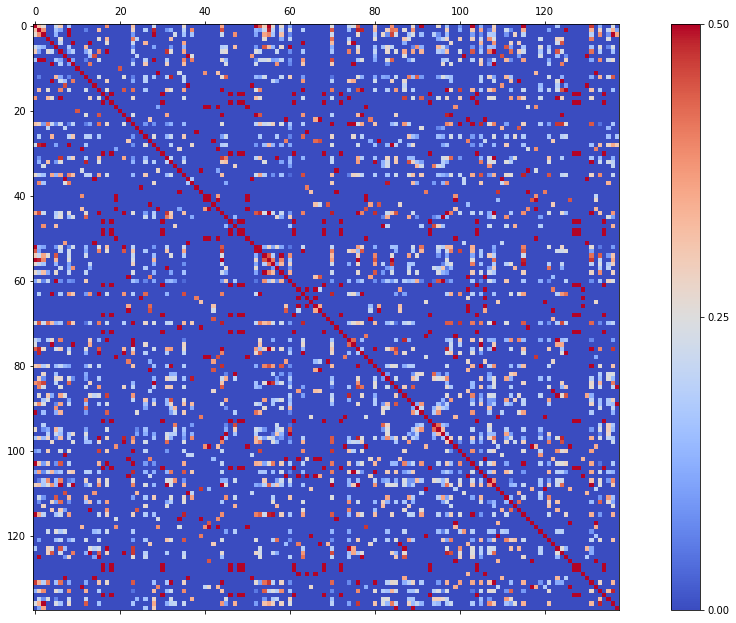

In [111]:
cax = plt.matshow(userSimilarity, fignum=1000, cmap=plt.cm.coolwarm)
plt.gcf().colorbar(cax, ticks=[0, 0.25, 0.5])
plt.clim(0, 0.5)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [112]:
np.mean(userSimilarity), np.std(userSimilarity)

(0.06092807900019031, 0.1708377976929834)

In [113]:
print(userSimilarity.shape, uMatrixTraining.shape)

(138, 138) (138, 95)


In [114]:
norm = np.array([userSimilarity.sum(axis=1)]).T

In [115]:
userItemCFpredictions = userSimilarity.dot(uMatrixTraining) / norm

In [116]:
# Be careful: take a look at the values
np.max(userItemCFpredictions), np.min(userItemCFpredictions), np.mean(userItemCFpredictions), np.std(userItemCFpredictions)

(1.8405525111528973, 0.0, 0.06704876313455181, 0.17123879899370997)

In [117]:
sum_ = uMatrixTraining.sum(axis=1)
print(sum_)
len_ =np.count_nonzero(uMatrixTraining, axis=1)
len__=np.zeros(len(len_))
for i in range(len(len_)):
    len__[i]=float(len_[i])
    if len_[i]==0:
        len__[i]=0.5
print(len__)
average_ratings = np.tile(sum_// len_, n_items).reshape([n_items, n_users]).T

[ 5. 11. 13.  6.  3.  7.  5.  9. 10.  4.  3.  6. 10.  4.  5. 10.  0.  3.
  0.  5.  2.  1.  2. 14.  5.  4.  7.  7.  7.  5.  0.  6.  7.  3.  4. 13.
  4.  4.  1.  2.  5.  3.  5.  7.  8.  8.  0.  9.  0.  0.  1.  4.  7. 10.
 10.  2.  6. 10. 13.  3. 20.  0.  4.  5.  4.  3.  6.  4.  0.  2. 16.  2.
  0.  2.  7.  4.  5.  8.  4.  4.  5.  1. 11. 13.  6.  7.  7.  8.  6. 13.
  8.  5.  6.  0. 10. 15. 20. 11.  7.  6.  9.  8.  7. 10.  0. 15.  4. 12.
 12.  5.  8.  5.  6.  2.  5.  9.  2.  2.  6.  5.  6. 10.  7.  4.  4.  7.
  2.  0.  0.  1.  5. 10.  7. 14.  0. 13. 16.  3.]
[ 3.   8.   7.   3.   2.   6.   5.   8.   7.   3.   2.   3.   7.   4.
  4.   5.   0.5  3.   0.5  3.   1.   1.   1.  12.   3.   2.   7.   5.
  6.   3.   0.5  5.   4.   3.   3.   7.   3.   3.   1.   2.   3.   2.
  5.   4.   5.   6.   0.5  5.   0.5  0.5  1.   3.   4.   5.   5.   1.
  6.   6.   7.   2.  13.   0.5  3.   4.   3.   2.   5.   4.   0.5  1.
  9.   1.   0.5  1.   5.   2.   3.   4.   3.   3.   5.   1.   7.   7.
  3.   4.   5.   5.

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in floor_divide
  # Remove the CWD from sys.path while we load stuff.


In [118]:
np.count_nonzero(uMatrixTraining[18,:])

0

In [119]:
average_ratings[18]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [120]:
uMatrixTraining_shifted = uMatrixTraining - np.multiply(average_ratings, uMatrixTraining)

In [121]:
uMatrixTraining[18] - np.multiply(average_ratings, uMatrixTraining)

array([[ 0., -2.,  0., ...,  0.,  0.,  0.],
       [ 0., -2., -1., ...,  0.,  0.,  0.],
       [ 0., -2.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0., -4.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [122]:
userItemCFpredictions_corrected = average_ratings + userSimilarity.dot(uMatrixTraining_shifted) / norm

In [123]:
# Now rating values are more reasonable
np.max(userItemCFpredictions_corrected), np.min(userItemCFpredictions_corrected), np.mean(userItemCFpredictions_corrected), np.std(userItemCFpredictions_corrected)

/home/javier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(nan, nan, nan, nan)

In [124]:
userSimilarity.dot(uMatrixTraining_shifted)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [125]:
for i in range(138):
    print(i)
    print(uMatrixTraining_shifted[i])

0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
126
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
127
[nan nan nan nan nan 

In [126]:
userSimilarity.shape

(138, 138)